In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp

import random

In [2]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5, "grid.linewidth": 0.2})

plt.rcParams['figure.figsize'] = 14, 8

# Raw Data From Keras

In [3]:
raw_data = '''
loss: 1.7223 - acc: 0.5007 - val_loss: 1.4217 - val_acc: 0.5781
loss: 1.4624 - acc: 0.5681 - val_loss: 1.3403 - val_acc: 0.5997
loss: 1.4099 - acc: 0.5822 - val_loss: 1.3084 - val_acc: 0.6095
loss: 1.3825 - acc: 0.5897 - val_loss: 1.2863 - val_acc: 0.6169
loss: 1.3644 - acc: 0.5945 - val_loss: 1.2740 - val_acc: 0.6203
loss: 1.3508 - acc: 0.5984 - val_loss: 1.2650 - val_acc: 0.6215
loss: 1.3412 - acc: 0.6010 - val_loss: 1.2571 - val_acc: 0.6251
loss: 1.3328 - acc: 0.6032 - val_loss: 1.2504 - val_acc: 0.6268
loss: 1.3262 - acc: 0.6050 - val_loss: 1.2447 - val_acc: 0.6281
loss: 1.3205 - acc: 0.6066 - val_loss: 1.2402 - val_acc: 0.6300
loss: 1.3154 - acc: 0.6079 - val_loss: 1.2365 - val_acc: 0.6309
loss: 1.3113 - acc: 0.6091 - val_loss: 1.2327 - val_acc: 0.6316
loss: 1.3079 - acc: 0.6100 - val_loss: 1.2313 - val_acc: 0.6323
loss: 1.3047 - acc: 0.6110 - val_loss: 1.2285 - val_acc: 0.6332
loss: 1.3020 - acc: 0.6116 - val_loss: 1.2257 - val_acc: 0.6341
loss: 1.2997 - acc: 0.6121 - val_loss: 1.2218 - val_acc: 0.6352
loss: 1.2973 - acc: 0.6127 - val_loss: 1.2215 - val_acc: 0.6351
loss: 1.2953 - acc: 0.6136 - val_loss: 1.2219 - val_acc: 0.6345
loss: 1.2929 - acc: 0.6141 - val_loss: 1.2199 - val_acc: 0.6355
loss: 1.2909 - acc: 0.6146 - val_loss: 1.2164 - val_acc: 0.6366
loss: 1.2893 - acc: 0.6150 - val_loss: 1.2151 - val_acc: 0.6366
loss: 1.2873 - acc: 0.6156 - val_loss: 1.2126 - val_acc: 0.6372
loss: 1.2859 - acc: 0.6160 - val_loss: 1.2122 - val_acc: 0.6371
loss: 1.2851 - acc: 0.6165 - val_loss: 1.2106 - val_acc: 0.6372
loss: 1.2824 - acc: 0.6170 - val_loss: 1.2097 - val_acc: 0.6375
loss: 1.2819 - acc: 0.6172 - val_loss: 1.2091 - val_acc: 0.6373
loss: 1.2796 - acc: 0.6177 - val_loss: 1.2072 - val_acc: 0.6388
loss: 1.2784 - acc: 0.6179 - val_loss: 1.2067 - val_acc: 0.6384
loss: 1.2768 - acc: 0.6184 - val_loss: 1.2057 - val_acc: 0.6388
loss: 1.2757 - acc: 0.6186 - val_loss: 1.2035 - val_acc: 0.6395
loss: 1.2746 - acc: 0.6188 - val_loss: 1.2034 - val_acc: 0.6391
loss: 1.2727 - acc: 0.6194 - val_loss: 1.2026 - val_acc: 0.6397
loss: 1.2714 - acc: 0.6200 - val_loss: 1.2012 - val_acc: 0.6400
loss: 1.2704 - acc: 0.6202 - val_loss: 1.1995 - val_acc: 0.6406
loss: 1.2683 - acc: 0.6207 - val_loss: 1.1979 - val_acc: 0.6413
loss: 1.2666 - acc: 0.6213 - val_loss: 1.1973 - val_acc: 0.6421
loss: 1.2655 - acc: 0.6218 - val_loss: 1.1955 - val_acc: 0.6419
loss: 1.2641 - acc: 0.6223 - val_loss: 1.1933 - val_acc: 0.6429
loss: 1.2630 - acc: 0.6221 - val_loss: 1.1939 - val_acc: 0.6427
loss: 1.2614 - acc: 0.6229 - val_loss: 1.1930 - val_acc: 0.6427
loss: 1.2607 - acc: 0.6230 - val_loss: 1.1912 - val_acc: 0.6431
loss: 1.2590 - acc: 0.6236 - val_loss: 1.1915 - val_acc: 0.6435
loss: 1.2582 - acc: 0.6237 - val_loss: 1.1907 - val_acc: 0.6434
loss: 1.2576 - acc: 0.6238 - val_loss: 1.1899 - val_acc: 0.6437
loss: 1.2562 - acc: 0.6243 - val_loss: 1.1893 - val_acc: 0.6443
loss: 1.2552 - acc: 0.6244 - val_loss: 1.1883 - val_acc: 0.6452
loss: 1.2542 - acc: 0.6249 - val_loss: 1.1874 - val_acc: 0.6441
loss: 1.2536 - acc: 0.6249 - val_loss: 1.1874 - val_acc: 0.6447
loss: 1.2529 - acc: 0.6252 - val_loss: 1.1850 - val_acc: 0.6454
loss: 1.2519 - acc: 0.6254 - val_loss: 1.1856 - val_acc: 0.6451
loss: 1.2518 - acc: 0.6253 - val_loss: 1.1860 - val_acc: 0.6448
loss: 1.2512 - acc: 0.6255 - val_loss: 1.1848 - val_acc: 0.6452
loss: 1.2501 - acc: 0.6258 - val_loss: 1.1844 - val_acc: 0.6454
loss: 1.2495 - acc: 0.6259 - val_loss: 1.1821 - val_acc: 0.6458
loss: 1.2489 - acc: 0.6261 - val_loss: 1.1859 - val_acc: 0.6448
loss: 1.2477 - acc: 0.6265 - val_loss: 1.1828 - val_acc: 0.6457
loss: 1.2471 - acc: 0.6266 - val_loss: 1.1821 - val_acc: 0.6461
loss: 1.2466 - acc: 0.6270 - val_loss: 1.1815 - val_acc: 0.6467
loss: 1.2409 - acc: 0.6283 - val_loss: 1.1772 - val_acc: 0.6482
loss: 1.2450 - acc: 0.6271 - val_loss: 1.1816 - val_acc: 0.6463
loss: 1.2445 - acc: 0.6275 - val_loss: 1.1802 - val_acc: 0.6466
loss: 1.2436 - acc: 0.6275 - val_loss: 1.1801 - val_acc: 0.6470
loss: 1.2432 - acc: 0.6277 - val_loss: 1.1797 - val_acc: 0.6473
loss: 1.2424 - acc: 0.6281 - val_loss: 1.1791 - val_acc: 0.6469
loss: 1.2421 - acc: 0.6281 - val_loss: 1.1786 - val_acc: 0.6471
loss: 1.2409 - acc: 0.6283 - val_loss: 1.1772 - val_acc: 0.6482
loss: 1.2405 - acc: 0.6285 - val_loss: 1.1785 - val_acc: 0.6471
loss: 1.2398 - acc: 0.6288 - val_loss: 1.1766 - val_acc: 0.6477
loss: 1.2398 - acc: 0.6285 - val_loss: 1.1772 - val_acc: 0.6472
loss: 1.2389 - acc: 0.6289 - val_loss: 1.1764 - val_acc: 0.6479
loss: 1.2389 - acc: 0.6290 - val_loss: 1.1762 - val_acc: 0.6473
loss: 1.2383 - acc: 0.6290 - val_loss: 1.1755 - val_acc: 0.6473
loss: 1.2377 - acc: 0.6292 - val_loss: 1.1749 - val_acc: 0.6481
loss: 1.2375 - acc: 0.6295 - val_loss: 1.1759 - val_acc: 0.6486
loss: 1.2366 - acc: 0.6297 - val_loss: 1.1756 - val_acc: 0.6479
loss: 1.2368 - acc: 0.6295 - val_loss: 1.1740 - val_acc: 0.6486
loss: 1.2357 - acc: 0.6299 - val_loss: 1.1732 - val_acc: 0.6489
loss: 1.2347 - acc: 0.6301 - val_loss: 1.1738 - val_acc: 0.6488
loss: 1.2348 - acc: 0.6298 - val_loss: 1.1731 - val_acc: 0.6481
loss: 1.2345 - acc: 0.6298 - val_loss: 1.1735 - val_acc: 0.6477
loss: 1.2124 - acc: 0.6354 - val_loss: 1.1489 - val_acc: 0.6556
loss: 1.2047 - acc: 0.6378 - val_loss: 1.1467 - val_acc: 0.6561
loss: 1.2031 - acc: 0.6381 - val_loss: 1.1449 - val_acc: 0.6565
loss: 1.2014 - acc: 0.6385 - val_loss: 1.1441 - val_acc: 0.6568
loss: 1.2008 - acc: 0.6387 - val_loss: 1.1430 - val_acc: 0.6571
loss: 1.2000 - acc: 0.6390 - val_loss: 1.1424 - val_acc: 0.6576
loss: 1.1995 - acc: 0.6392 - val_loss: 1.1422 - val_acc: 0.6573
loss: 1.1986 - acc: 0.6394 - val_loss: 1.1418 - val_acc: 0.6574
loss: 1.1980 - acc: 0.6397 - val_loss: 1.1415 - val_acc: 0.6576
loss: 1.1979 - acc: 0.6395 - val_loss: 1.1408 - val_acc: 0.6581
loss: 1.1972 - acc: 0.6398 - val_loss: 1.1404 - val_acc: 0.6579
loss: 1.1974 - acc: 0.6397 - val_loss: 1.1402 - val_acc: 0.6580
loss: 1.1973 - acc: 0.6397 - val_loss: 1.1401 - val_acc: 0.6581
loss: 1.1960 - acc: 0.6401 - val_loss: 1.1399 - val_acc: 0.6581
loss: 1.1957 - acc: 0.6400 - val_loss: 1.1396 - val_acc: 0.6585
loss: 1.1958 - acc: 0.6400 - val_loss: 1.1390 - val_acc: 0.6585
loss: 1.1961 - acc: 0.6400 - val_loss: 1.1391 - val_acc: 0.6583
loss: 1.1959 - acc: 0.6399 - val_loss: 1.1391 - val_acc: 0.6585
loss: 1.1950 - acc: 0.6403 - val_loss: 1.1388 - val_acc: 0.6585
loss: 1.1947 - acc: 0.6403 - val_loss: 1.1386 - val_acc: 0.6585
loss: 1.1946 - acc: 0.6403 - val_loss: 1.1385 - val_acc: 0.6588
loss: 1.1946 - acc: 0.6403 - val_loss: 1.1378 - val_acc: 0.6588
loss: 1.1946 - acc: 0.6404 - val_loss: 1.1385 - val_acc: 0.6588
loss: 1.1941 - acc: 0.6405 - val_loss: 1.1379 - val_acc: 0.6588
loss: 1.1940 - acc: 0.6405 - val_loss: 1.1375 - val_acc: 0.6591
loss: 1.1939 - acc: 0.6406 - val_loss: 1.1374 - val_acc: 0.6588
loss: 1.1941 - acc: 0.6403 - val_loss: 1.1372 - val_acc: 0.6591
loss: 1.1931 - acc: 0.6407 - val_loss: 1.1374 - val_acc: 0.6591
loss: 1.1935 - acc: 0.6407 - val_loss: 1.1370 - val_acc: 0.6591
loss: 1.1929 - acc: 0.6411 - val_loss: 1.1370 - val_acc: 0.6592
loss: 1.1933 - acc: 0.6407 - val_loss: 1.1368 - val_acc: 0.6592
loss: 1.1926 - acc: 0.6409 - val_loss: 1.1365 - val_acc: 0.6594
loss: 1.1927 - acc: 0.6409 - val_loss: 1.1360 - val_acc: 0.6592
loss: 1.1927 - acc: 0.6409 - val_loss: 1.1359 - val_acc: 0.6596
'''

In [4]:
def parse_data(data):
    lines = [
        [datum.split(': ')[-1] for datum in l if not l[0].startswith('Epoch')]
            for l in
        [line.split(' - ') for line in data.splitlines() if line]
    ]
    if all(['=' in i[0] for i in lines if i]):
        lines = [i[2:] for i in lines if i]
    return pd.DataFrame(lines, columns=['loss', 'acc', 'val_loss', 'val_acc']).applymap(float)

def plot_curves(cols, title='Network Training Progress', xlabel='Epochs', ylabel='Curves', **kwargs):
    ax = df[cols].plot(figsize=(14, 8),
                       title=title,
                       kind='line',
                       colormap='Pastel2',
                       markersize=14,
                       marker='.',
                       **kwargs)
    ax.set(xlabel=ylabel, ylabel=ylabel)
    sns.despine(ax=ax);

In [5]:
df = parse_data(raw_data)

# Plots

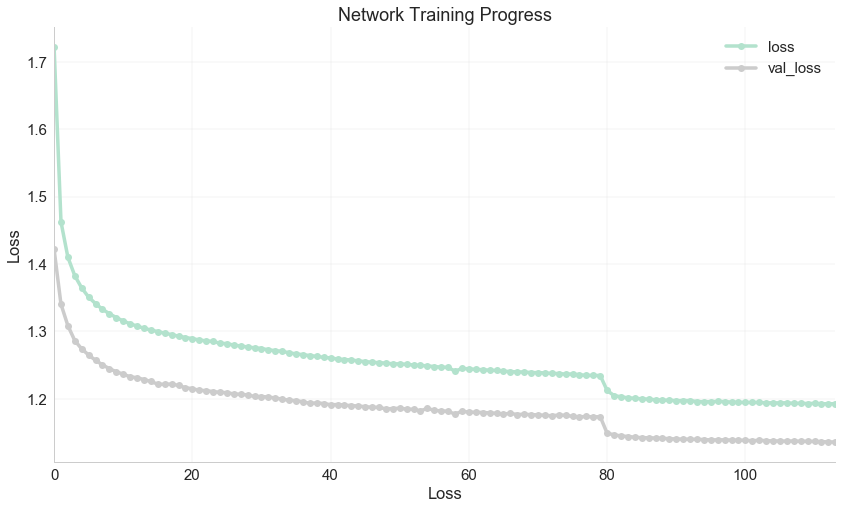

In [6]:
plot_curves(['loss', 'val_loss'], ylabel='Loss')

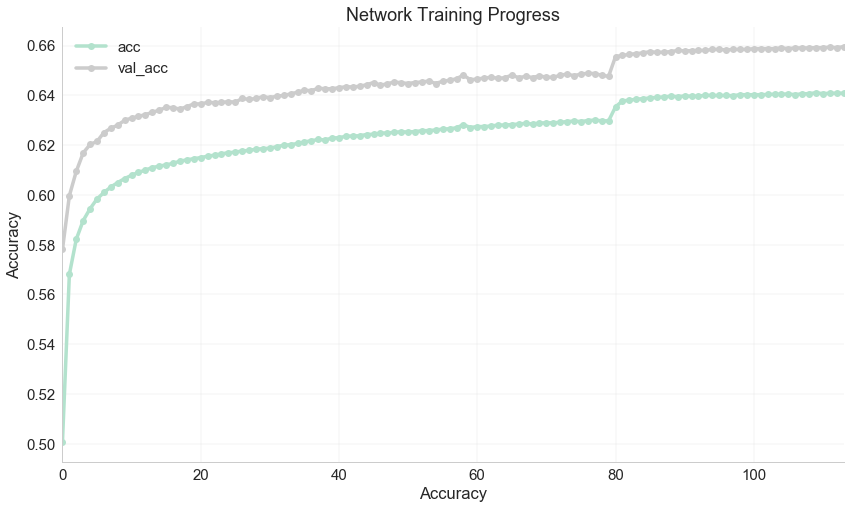

In [7]:
plot_curves(['acc', 'val_acc'], ylabel='Accuracy')

# Curve Fit the Loss Function

## Function

$$
f(x) = Ae^{-Bx} + C
$$

In [8]:
def f(x, a, b, c):
    return a * np.exp(-b * x) + c

## Fit the Parameters

In [9]:
x = np.arange(len(df.val_loss.values))
y = df.val_loss.values

(a, b, c), err = sp.optimize.curve_fit(f,  x,  y)

## Check Error

In [10]:
print(a, b, c)
print(err)

0.160169413647 0.0305677269462 1.14082122438
[[  3.88785300e-05   1.22468907e-06  -9.39527365e-06]
 [  1.22468907e-06   1.13288725e-05   1.43155342e-05]
 [ -9.39527365e-06   1.43155342e-05   2.38149057e-05]]


f(x) = 0.160e^-0.031x + 1.141


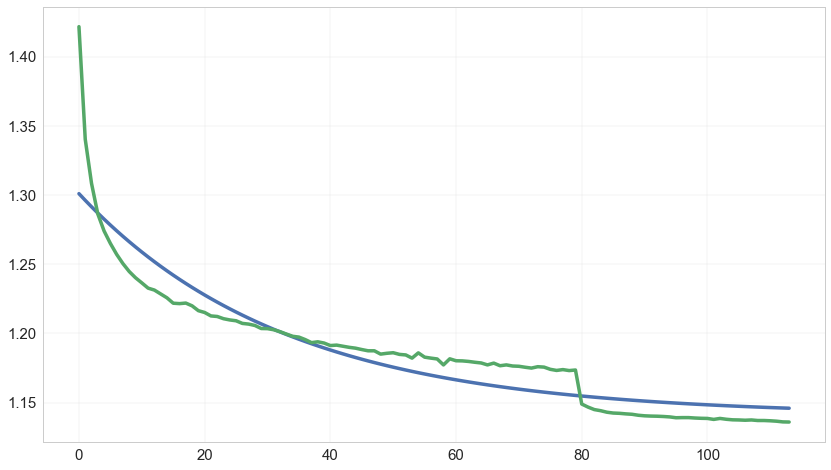

In [11]:
X = np.arange(0, 100)

print('f(x) = {a:.3f}e^-{b:.3f}x + {c:.3f}'.format(a=a,b=b,c=c))
plt.plot(x, f(x, a, b, c))
plt.plot(x, y);

# Check Where Validation Loss Improved

In [12]:
val_loss_diff = pd.Series(df.val_loss.values[:-1] - df.val_loss.values[1:])

val_loss_diff

0      0.0814
1      0.0319
2      0.0221
3      0.0123
4      0.0090
5      0.0079
6      0.0067
7      0.0057
8      0.0045
9      0.0037
10     0.0038
11     0.0014
12     0.0028
13     0.0028
14     0.0039
15     0.0003
16    -0.0004
17     0.0020
18     0.0035
19     0.0013
20     0.0025
21     0.0004
22     0.0016
23     0.0009
24     0.0006
25     0.0019
26     0.0005
27     0.0010
28     0.0022
29     0.0001
        ...  
83     0.0011
84     0.0006
85     0.0002
86     0.0004
87     0.0003
88     0.0007
89     0.0004
90     0.0002
91     0.0001
92     0.0002
93     0.0003
94     0.0006
95    -0.0001
96     0.0000
97     0.0003
98     0.0002
99     0.0001
100    0.0007
101   -0.0007
102    0.0006
103    0.0004
104    0.0001
105    0.0002
106   -0.0002
107    0.0004
108    0.0000
109    0.0002
110    0.0003
111    0.0005
112    0.0001
Length: 113, dtype: float64

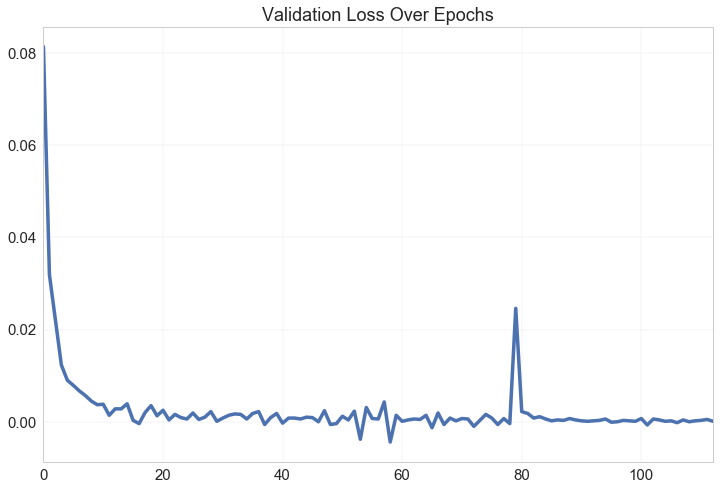

In [13]:
val_loss_diff.plot(figsize=(12,8),
                   title='Validation Loss Over Epochs');